In [1]:
from pathlib import Path
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Generate Overview DataFrame

In [2]:
path_to_experiments= Path('/share/home/e2405193/MAE3D-SingleTree/experiments')

In [17]:
exps_to_include = [d for d in path_to_experiments.iterdir() if d.is_dir() and d.name.endswith('als50k')]
exps_to_include = [d for d in path_to_experiments.iterdir() if d.is_dir()]
# To remove an element from a list by index, use pop():
# For example, to remove the element at index 2:
exps_to_include.pop(2)
exps_to_include

[PosixPath('/share/home/e2405193/MAE3D-SingleTree/experiments/baseline_cu_patching_als50k'),
 PosixPath('/share/home/e2405193/MAE3D-SingleTree/experiments/bl_cu_patching_forspecies'),
 PosixPath('/share/home/e2405193/MAE3D-SingleTree/experiments/baseline_rand_patching_als50k')]

In [18]:
dfs_exp = []
for exp in exps_to_include: 
    print(exp)

    splitting = exp.name.split('_')[1]
    dataset = exp.name.split('_')[-1]

    path_to_results = exp / 'results'
    files = [f for f in path_to_results.glob('*_allrepetitions.csv') if 'probing' not in f.name]

    dfs = []
    for f in files:
        frac_str = f.name.split('_')[1]
        frac = float(frac_str)
        df = pd.read_csv(f)
        df = df.set_index('Unnamed: 0')
        df_append = pd.DataFrame(
            {
                'Val R2': df.loc['mean']['Validation R2'], 
                'Val R2 std': df.loc['std']['Validation R2'],
                'Test R2': df.loc['mean']['Test R2'],
                'Test R2 std': df.loc['std']['Test R2'],
                'Val RMSE': df.loc['mean']['Validation RMSE'],
                'Val RMSE std': df.loc['std']['Validation RMSE'],
                'Test RMSE': df.loc['mean']['Test RMSE'],
                'Test RMSE std': df.loc['std']['Test RMSE'],
                'Fraction': frac
            },
            index=[0]
        )
        dfs.append(df_append)

    dfs = pd.concat(dfs, ignore_index=True)
    dfs['dataset'] = [dataset] * len(dfs)
    dfs['splitting'] = [splitting] * len(dfs)
    dfs_exp.append(dfs)


dfs_exp = pd.concat(dfs_exp, ignore_index=True)
dfs_exp

/share/home/e2405193/MAE3D-SingleTree/experiments/baseline_cu_patching_als50k
/share/home/e2405193/MAE3D-SingleTree/experiments/bl_cu_patching_forspecies
/share/home/e2405193/MAE3D-SingleTree/experiments/baseline_rand_patching_als50k


,Val R2,Val R2 std,Test R2,Test R2 std,Val RMSE,Val RMSE std,Test RMSE,Test RMSE std,Fraction,dataset,splitting
0,0.62,0.03,0.55,0.05,26.39,0.87,27.02,1.45,1.00,als50k,cu
1,0.42,0.03,0.09,0.09,32.44,0.80,38.35,1.87,0.10,als50k,cu
2,0.60,0.02,0.54,0.02,26.87,0.56,27.39,0.71,0.75,als50k,cu
3,0.61,0.05,0.44,0.01,26.75,1.58,30.24,0.17,0.50,als50k,cu
4,0.45,0.03,0.21,0.01,31.64,0.77,35.83,0.14,0.25,als50k,cu
5,0.64,0.03,0.56,0.11,25.72,0.98,26.59,3.16,1.00,forspecies,cu
6,0.44,0.03,0.14,0.03,31.99,0.76,37.47,0.61,0.10,forspecies,cu
7,0.63,0.02,0.53,0.08,25.91,0.58,27.59,2.33,0.75,forspecies,cu
8,0.60,0.02,0.52,0.04,27.03,0.80,27.84,1.05,0.50,forspecies,cu
9,0.44,0.02,0.19,0.02,31.97,0.48,36.38,0.36,0.25,forspecies,cu


In [21]:
dfs_exp.sort_values('Test R2', ascending=False)

,Val R2,Val R2 std,Test R2,Test R2 std,Val RMSE,Val RMSE std,Test RMSE,Test RMSE std,Fraction,dataset,splitting
5,0.64,0.03,0.56,0.11,25.72,0.98,26.59,3.16,1.00,forspecies,cu
0,0.62,0.03,0.55,0.05,26.39,0.87,27.02,1.45,1.00,als50k,cu
2,0.60,0.02,0.54,0.02,26.87,0.56,27.39,0.71,0.75,als50k,cu
12,0.60,0.02,0.54,0.02,26.87,0.56,27.39,0.71,0.75,als50k,rand
7,0.63,0.02,0.53,0.08,25.91,0.58,27.59,2.33,0.75,forspecies,cu
10,0.61,0.03,0.53,0.11,26.52,0.99,27.64,3.12,1.00,als50k,rand
8,0.60,0.02,0.52,0.04,27.03,0.80,27.84,1.05,0.50,forspecies,cu
3,0.61,0.05,0.44,0.01,26.75,1.58,30.24,0.17,0.50,als50k,cu
13,0.61,0.01,0.39,0.08,26.75,0.31,31.43,1.93,0.50,als50k,rand
4,0.45,0.03,0.21,0.01,31.64,0.77,35.83,0.14,0.25,als50k,cu


In [24]:
dfs_exp[dfs_exp['splitting'] == 'rand'].sort_values(by='Fraction', ascending=True)

,Val R2,Val R2 std,Test R2,Test R2 std,Val RMSE,Val RMSE std,Test RMSE,Test RMSE std,Fraction,dataset,splitting
6,0.40,0.02,0.14,0.03,33.05,0.60,37.38,0.76,0.10,als50k,rand
7,0.45,0.03,0.21,0.01,31.64,0.77,35.83,0.14,0.25,als50k,rand
5,0.61,0.03,0.53,0.11,26.52,0.99,27.64,3.12,1.00,als50k,rand


## Efficiency Plots

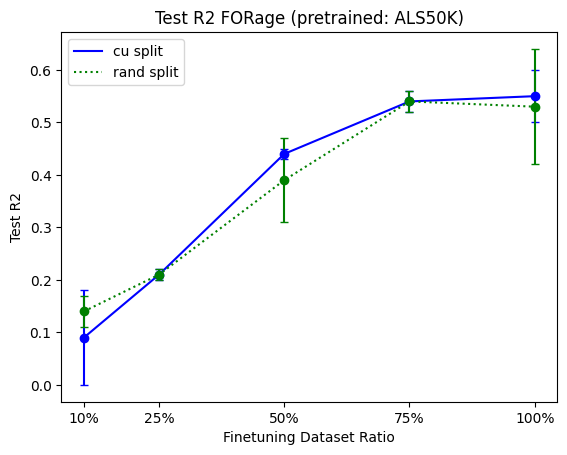

In [29]:
# Plot Test R2 for different splitting strategies in the als50k dataset
for split, style, color in zip(['cu', 'rand'], ['solid', 'dotted'], ['blue', 'green']):
    data = dfs_exp[(dfs_exp['dataset'] == 'als50k') & (dfs_exp['splitting'] == split)]
    sns.lineplot(
        data=data,
        x='Fraction', y='Test R2', label=f'{split} split', linestyle=style, color=color
    )
    plt.errorbar(
        data['Fraction'], data['Test R2'], yerr=data['Test R2 std'],
        fmt='o', color=color, capsize=3
    )

plt.xlabel('Finetuning Dataset Ratio')
plt.ylabel('Test R2')
plt.title('Test R2 FORage (pretrained: ALS50K)')
plt.xticks([0.1, 0.25, 0.5, 0.75, 1.0], ['10%', '25%', '50%', '75%', '100%'])
plt.legend()
plt.show()


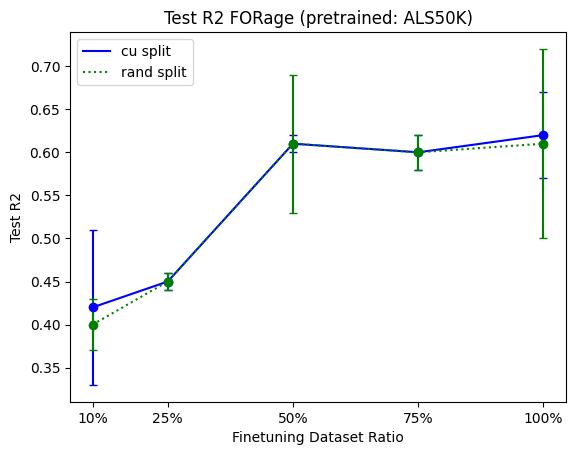

In [30]:
# Plot Validation R2 for different splitting strategies in the als50k dataset
for split, style, color in zip(['cu', 'rand'], ['solid', 'dotted'], ['blue', 'green']):
    data = dfs_exp[(dfs_exp['dataset'] == 'als50k') & (dfs_exp['splitting'] == split)]
    sns.lineplot(
        data=data,
        x='Fraction', y='Val R2', label=f'{split} split', linestyle=style, color=color
    )
    plt.errorbar(
        data['Fraction'], data['Val R2'], yerr=data['Test R2 std'],
        fmt='o', color=color, capsize=3
    )

plt.xlabel('Finetuning Dataset Ratio')
plt.ylabel('Test R2')
plt.title('Test R2 FORage (pretrained: ALS50K)')
plt.xticks([0.1, 0.25, 0.5, 0.75, 1.0], ['10%', '25%', '50%', '75%', '100%'])
plt.legend()
plt.show()

## Regression Plots

In [ ]:
def calculate_metrics(df):
    
    gt = df['Ground Truth']
    pred = df['Predictions']

    MAE = (pred - gt).abs().mean()
    MSE = ((pred - gt) ** 2).mean()
    RMSE = MSE ** 0.5 
    MBE = (pred - gt).mean()
    R2 = 1 - (MSE / ((gt - gt.mean()) ** 2).mean())

    return {
        'MAE': round(MAE, 2),
        'MSE': round(MSE, 2),
        'RMSE': round(RMSE, 2),
        'MBE': round(MBE, 2),
        'R2': round(R2, 2)
    }

In [ ]:
def plot_results(ax, df, metrics, title, pos_box=[0.1, 0.95]):
    sns.scatterplot(ax=ax, data=df, x='Ground Truth', y='Predictions', alpha=0.8, label='Predictions vs True Age')
    ax.set_title('Predicted vs True Age')
    ax.set_xlabel('True Age')
    ax.set_ylabel('Predicted Ground Truth')
    ax.set_aspect('equal', adjustable='box')
    ax.plot([df['Ground Truth'].min(), df['Ground Truth'].max()], [df['Ground Truth'].min(), df['Ground Truth'].max()], color='red', linestyle='--', label='Ideal Prediction')
    ax.grid()
    metrics_text = '\n'.join([f"{key}: {value}" for key, value in metrics.items()])
    props = dict(facecolor='white', alpha=0.8)
    ax.text(
        pos_box[0], pos_box[1], metrics_text, transform=ax.transAxes,
        fontsize=10, verticalalignment='top', bbox=props
    )
    ax.legend(loc='lower right')
    ax.set_title(title)